### Import libraries

In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize, pos_tag
from tqdm import tqdm

In [2]:
data = pd.read_csv(r'tweet.csv', encoding = "ISO-8859-1")
data.head()

,tweet,emotion
0,advice Talk to your neighbours family to excha...,positive
1,Coronavirus Australia: Woolworths to give elde...,positive
2,My food stock is not the only one which is emp...,positive
3,"Me, ready to go at supermarket during the #COV...",negative
4,As news of the regionÂs first confirmed COVID...,positive


In [3]:
data['tweet'][10]

"Me: I don't need to stock up on food, I'll just have Amazon deliver whatever I need #CoronaVirus\r\r\n\r\r\nAmazon: https://t.co/8YWaKFjExC"

In [4]:
def cleansing(dataset):
    '''
    clean the dataset from special characters, links and alphanumeric words.
    '''
    #remove links
    dataset['cleaned'] = dataset['tweet'].str.replace('(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)',"")

    #remove words starting with @
    dataset['cleaned'] = dataset['cleaned'].str.replace('(\@\w+.*?)',"")

    #remove words starting with #
    dataset['cleaned'] = dataset['cleaned'].str.replace('(\#\w+.*?)',"")

    # Substituting multiple spaces with single space
    dataset['cleaned'] = dataset['cleaned'].str.replace(r'\s+', " ")

    #keep only alphabetical words (remove punctuation alphanumerics etc)
    dataset['cleaned'] = dataset['cleaned'].str.replace('[^\w\s]','')
    
    return dataset

In [5]:
cleansing(data)

C:\Users\sokin\AppData\Local\Temp/ipykernel_31132/165741732.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['cleaned'] = dataset['tweet'].str.replace('(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)',"")
C:\Users\sokin\AppData\Local\Temp/ipykernel_31132/165741732.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['cleaned'] = dataset['cleaned'].str.replace('(\@\w+.*?)',"")
C:\Users\sokin\AppData\Local\Temp/ipykernel_31132/165741732.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['cleaned'] = dataset['cleaned'].str.replace('(\#\w+.*?)',"")
C:\Users\sokin\AppData\Local\Temp/ipykernel_31132/165741732.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['cleaned'] = dataset['cleaned'].str.replace(r'\s+', " ")
C:\Users\sokin\AppData\Local\Temp/

,tweet,emotion,cleaned
0,advice Talk to your neighbours family to excha...,positive,advice Talk to your neighbours family to excha...
1,Coronavirus Australia: Woolworths to give elde...,positive,Coronavirus Australia Woolworths to give elder...
2,My food stock is not the only one which is emp...,positive,My food stock is not the only one which is do...
3,"Me, ready to go at supermarket during the #COV...",negative,Me ready to go at supermarket during the outbr...
4,As news of the regionÂs first confirmed COVID...,positive,As news of the regionÂs first confirmed COVID1...
...,...,...,...
33439,I never that weÂd be in a situation &amp; wor...,positive,I never that weÂd be in a situation amp world ...
33440,@MrSilverScott you are definitely my man. I fe...,positive,you are definitely my man I feel like this fa...
33441,Response to complaint not provided citing COVI...,negative,Response to complaint not provided citing COVI...
33442,You know itÂs getting tough when @KameronWild...,positive,You know itÂs getting tough when is rationing ...


In [6]:
data['cleaned'][10]

'Me I dont need to stock up on food Ill just have Amazon deliver whatever I need Amazon '

### StopWords, Lemmatizer, POS tagging

In [7]:
words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()
# for each cell, we split the words in  a list of words, and if this word is not in stopwords we lemmatize it. 
#Then the list of words is again concatenated as a sentence and lower case is applied.
data['cleaned'] = data['cleaned'].apply(lambda x: " ".join([lemmatizer.lemmatize(i) \
                                        for i in re.sub("[^a-zA-Z]", " ",\
                                        str(x)).split() if i not in words]).lower())

#we turn words in tokens and apply Part of Speech Tagging
data['cleaned'] = data['cleaned'].apply(word_tokenize).apply(pos_tag)
data['cleaned'][10]

[('me', 'PRP'),
 ('i', 'VBP'),
 ('dont', 'JJ'),
 ('need', 'NN'),
 ('stock', 'NN'),
 ('food', 'NN'),
 ('ill', 'VB'),
 ('amazon', 'NN'),
 ('deliver', 'IN'),
 ('whatever', 'WDT'),
 ('i', 'JJ'),
 ('need', 'VBP'),
 ('amazon', 'NNS')]

In [8]:
tag_filter = ["NN","NNS","NNP","NNPS","RB","RBR","RBS","JJ","JJR","JJS"]  #keep only nouns ,adjectives and adverbs 

def pos_filter(row):  
    '''
    filter only tokens of our interest regarding their POS classification
    '''
    keep_list=[]
    for x,y in row:
        if y in tag_filter:
            keep_list.append(x) 

    return keep_list

In [9]:
data['cleaned'] =data['cleaned'].apply(pos_filter)
data['cleaned'][10]

['dont', 'need', 'stock', 'food', 'amazon', 'i', 'amazon']

### Classification models

<AxesSubplot:>

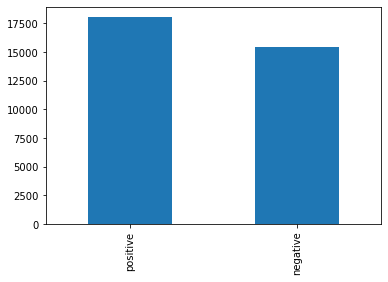

In [10]:
data['emotion'].value_counts().plot.bar(ylim=0)

In [11]:
data['emotion'] = data['emotion'].replace({'positive':1, 'negative':0})

In [12]:
X = data['cleaned'] #training
y = data['emotion'] # target

In [13]:
# we need to transform our text into a numeric representation
def identical_tokenizer(text):
    return text

In [14]:
vectorizer = CountVectorizer(tokenizer=identical_tokenizer,max_features=3000, min_df=5, lowercase=False)

X = vectorizer.fit_transform(X).toarray()
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,stratify=list(y))

In [16]:
models=[RandomForestClassifier(), SGDClassifier(loss='log')]

for clf in tqdm(models):
    clf.fit(X_train, y_train)
    print(str(clf),': ')
    y_pred = clf.predict(X_test)
    print(classification_report(y_test,y_pred))

  0%|          | 0/2 [00:00<?, ?it/s]

RandomForestClassifier() : 


 50%|█████     | 1/2 [05:55<05:55, 355.24s/it]

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1540
           1       0.80      0.82      0.81      1805

    accuracy                           0.79      3345
   macro avg       0.79      0.79      0.79      3345
weighted avg       0.79      0.79      0.79      3345



100%|██████████| 2/2 [06:01<00:00, 180.58s/it]

SGDClassifier(loss='log') : 
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1540
           1       0.81      0.84      0.82      1805

    accuracy                           0.81      3345
   macro avg       0.81      0.80      0.81      3345
weighted avg       0.81      0.81      0.81      3345



### Let's test our  SGD(log) classifier

In [17]:
test_1 = pd.Series(['This is the worst problem we had in years. I lost my job , my shape, everything'])
test_1 = vectorizer.transform(test_1)
clf.predict(test_1)[0]

0

In [18]:
test_2 = pd.Series(["Remote work is a big plus. I hope it stays after covid. I like working from home!! "])
test_2 = vectorizer.transform(test_2)
clf.predict(test_2)[0]

1